In [ ]:
#Exercise 1
# Try to build a classifier for the MNIST dataset that achives 97% accuracy 
# on the test set. Hint: the KNeighborsClassifier works quite well for this task;
# you just need to find good hyperparameter values (try a grid search on the
# weights and n_neighbors hyperparameters)

from sklearn.datasets import fetch_openml

mnist_ = fetch_openml(name="mnist_784", version='active')

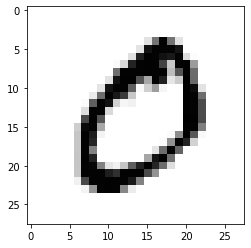

In [ ]:
from matplotlib import pyplot as plt
features = mnist_["data"]
labels = mnist_["target"]
idx_of_some_num = 1
some_num_to_img = features[idx_of_some_num].reshape([28, 28])
some_num = features[idx_of_some_num]
plt.imshow(some_num_to_img, cmap="Greys")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_cfr = KNeighborsClassifier()
#Split our data 
x_train, x_test, y_train, y_test = features[:60000], features[60000:], labels[:60000], labels[60000:]
y_train[1]
#Convert our labels into integers
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [ ]:
#train our model 
kn_cfr.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
import numpy as np

#Predict a value
print(f"The prediction for x_train[{idx_of_some_num}] is :{kn_cfr.predict([some_num])}")
print(f"The actual value is: {y_train[idx_of_some_num]}")


The prediction for x_train[1] is :[0]
The actual value is: 0


In [ ]:
#Now let's measure the preformance of our KNeighbors classifier
#Let's measure it using cross validation accuracy 
#from sklearn.model_selection import cross_val_score
#cross_val_score(kn_cfr, x_train, y_train, cv=3, scoring="accuracy")

In [ ]:
#let's do a gridSearchCV in order to have the hyperparameters for our model
from sklearn.model_selection import GridSearchCV
params_grid = {"weights": ["uniform", "distance"], "n_neighbors": [3,4,5]} 
grid_search = GridSearchCV(kn_cfr, params_grid, cv=3, scoring='accuracy', 
                           return_train_score = True)
grid_search.fit(x_train, y_train)


In [ ]:
#let's save our model 
import joblib
joblib.dump(grid_search, "grid_search_for_KNeighbors.pkl")
grid_search.best_params_
grid_search.best_score_


In [ ]:
#Let's try out our new model 
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)